# Load Data

In [1]:
import pandas as pd
import numpy as np

# This is the result of running scraper.py. 
input_df = pd.read_csv('output.csv', encoding = 'cp1252')
input_df


,URL,Ingredients,Steps,Cuisine
0,https://www.seriouseats.com/the-best-slow-cook...,"['cans whole peeled tomatoes, preferably impor...",['\nAdjust oven rack to lower position and pre...,"['Tomato Sauces', 'Italian-American']"
1,https://www.seriouseats.com/american-wheat-ale...,"['pounds Two-Row malt, crushed', 'pounds Malte...",['\nLine the 7.5 gallon kettle with the mesh b...,['Beer']
2,https://www.seriouseats.com/roasted-delicata-s...,"['tablespoons extra-virgin olive oil, divided...",['\nAdjust oven rack to lowest position and pr...,"['Winter Squash', 'Kale']"
3,https://www.seriouseats.com/roasted-sweet-pota...,"['For the Cookie Crust:', 'ounces fine cookie...",['\nFor the Cookie Crust: If using a two-piece...,"['Cheesecakes', 'Sweet Potatoes']"
4,https://www.seriouseats.com/butternut-squash-p...,"['large butternut squash', 'Neutral oil, such ...","[""\nAdjust oven rack to middle position and pr...","['Butternut Squash', 'Thanksgiving', 'Thanksgi..."
...,...,...,...,...
4748,https://www.seriouseats.com/turkey-bacon-brocc...,"['loaf hearty pumpernickel or other rye bread,...",['\nAdjust oven rack to center position and pr...,"['Sandwiches', 'British', 'Bacon', 'Turkey', '..."
4749,https://www.seriouseats.com/muffuletta-shooter...,"['hearty loaf of bread, preferably sesame-crus...",['\nSlice off the top 1 to 1 1/2-inches of the...,"['Sandwiches', 'Italian-American', 'Soul Food ..."
4750,https://www.seriouseats.com/shanghai-baby-bok-...,"['Kosher salt', 'ounces Shanghai baby bok choy...",['\nBring a large pot of salted water to a boi...,"['Chinese', 'Dairy-free Sides', 'Vegan Sides',..."
4751,https://www.seriouseats.com/how-to-brew-sour-b...,"['cups Briess light dry malt extract', '. poun...","['\nIn a medium saucepan, bring 1 liter of wat...",['Beer']


# Prepare Data

In [20]:
cuisineMap = {
    'Asian' : "Asian",
    'Singaporean' : 'Asian',
    'Filipino' : 'Asian', 
    'Korean' : 'Asian', 
    'SoutheastAsian' : 'Asian', 
    'EastAsian' : 'Asian', 
    'Chinese' : 'Asian', 
    'Vietnamese' : 'Asian', 
    'HungarianChinese-American' : 'Asian', 
    'Thai' : 'Asian', 
    'Japanese' : 'Asian', 
    'SouthAsian' : 'Asian', 
    'German' : 'German',
    'NorthAmerican' : 'NorthAmerican',
    'Canadian' : 'NorthAmerican', 
    'American' : 'NorthAmerican', 
    'SouthwesternTexMex' : 'NorthAmerican',
    'Italian-American' : 'NorthAmerican', 
    'SoulFoodSouthern' : 'NorthAmerican', 
    'WestCoast' : 'NorthAmerican',
    'CajunCreole' : 'NorthAmerican', 
    'NewEngland' : 'NorthAmerican', 
    'Midwestern' : 'NorthAmerican',
    'Italian' : 'Italian',
    'French' : 'French',
    'SouthAmerican' : 'SouthAmerican',
    'Brazilian' : 'SouthAmerican',
    'Venezuelan' : 'SouthAmerican',
    'Mexican':'Mexican',
    'Mediterranean' : 'Mediterranean',
    'Indian' : 'Indian'
}


# Get rid of bad text, and map the correct cuisine to the row
def cleanCuisines(df):
    dfMutated = pd.DataFrame()
    for index, row in df.iterrows():
        row['Cuisine'] = row['Cuisine'].replace('Cuisines',"").replace('Cuisine','').replace(" ",'')
        row['Cuisine'] = row['Cuisine'].replace('[','').replace(']','').replace('\'','').split(',')
        for ii in row['Cuisine']:
            if ii in cuisineMap.keys():
                newRow = {'URL': row['URL'],'Ingredients': row['Ingredients'],'Steps' : row['Steps'],'Cuisine':cuisineMap[ii]}
                dfMutated = dfMutated.append(newRow,ignore_index=True)
                break
    return dfMutated


# Make the steps into an actual list, while stripping it down to make it easier to read
def cleanSteps(df):
    for index, row in df.iterrows():
        row['Steps'] = row['Steps'].replace('[','').replace(']','').replace('\'','').replace('\\n','').split(',')
        for i in row['Steps']:
            i = i.strip()
        row['Steps'] = " ".join(row['Steps'])
    return df


# Clean the ingredients in a very similar way that we clean the steps
def cleanIngredients(df):
    for index, row in df.iterrows():
        row['Ingredients'] = row['Ingredients'].replace('[','').replace(']','').replace('\'','').split(',')
        for i in row['Ingredients']:
            i = i.strip()
        row['Ingredients'] = " ".join(row['Ingredients'])
    return df





processed_df = cleanCuisines(input_df)
processed_df = cleanSteps(processed_df)
processed_df = cleanIngredients(processed_df)
processed_df

,Cuisine,Ingredients,Steps,URL
0,NorthAmerican,cans whole peeled tomatoes preferably importe...,Adjust oven rack to lower position and preheat...,https://www.seriouseats.com/the-best-slow-cook...
1,Asian,Two -inch pieces fresh ginger one piece peel...,In a medium mixing bowl stir together grated ...,https://www.seriouseats.com/pork-ginger-buta-s...
2,Asian,pound finely minced Napa cabbage tablespoon k...,For the Dumplings: Combine cabbage and 2 teasp...,https://www.seriouseats.com/the-best-japanese-...
3,Italian,to ounces fresh sea urchin ; see note / cup ...,Set aside 4 tongues of sea urchin to use as ga...,https://www.seriouseats.com/sea-urchin-uni-pas...
4,Asian,large eggs ½ teaspoon lime juice or plain vin...,Combine eggs lime juice or vinegar fish sauc...,https://www.seriouseats.com/thai-style-omelet-...
...,...,...,...,...
1144,Mexican,pound dried black beans Kosher salt pounds c...,Place black beans in a large bowl and cover wi...,https://www.seriouseats.com/the-food-lab-black...
1145,Italian,quart cherry or plum tomatoes split in half ...,Adjust oven rack to center position and prehea...,https://www.seriouseats.com/pasta-oven-dried-t...
1146,NorthAmerican,hearty loaf of bread preferably sesame-cruste...,Slice off the top 1 to 1 1/2-inches of the loa...,https://www.seriouseats.com/muffuletta-shooter...
1147,Asian,Kosher salt ounces Shanghai baby bok choy sp...,Bring a large pot of salted water to a boil. A...,https://www.seriouseats.com/shanghai-baby-bok-...


In [21]:
#processed_df = processed_df[(processed_df['Cuisine'] == 'Asian') | (processed_df['Cuisine'] == 'NorthAmerican') | (processed_df['Cuisine'] == 'Italian') | (processed_df['Cuisine'] == 'Mexican') | (processed_df['Cuisine'] == 'French') | (processed_df['Cuisine'] == 'Indian')]

# Visualizing Data

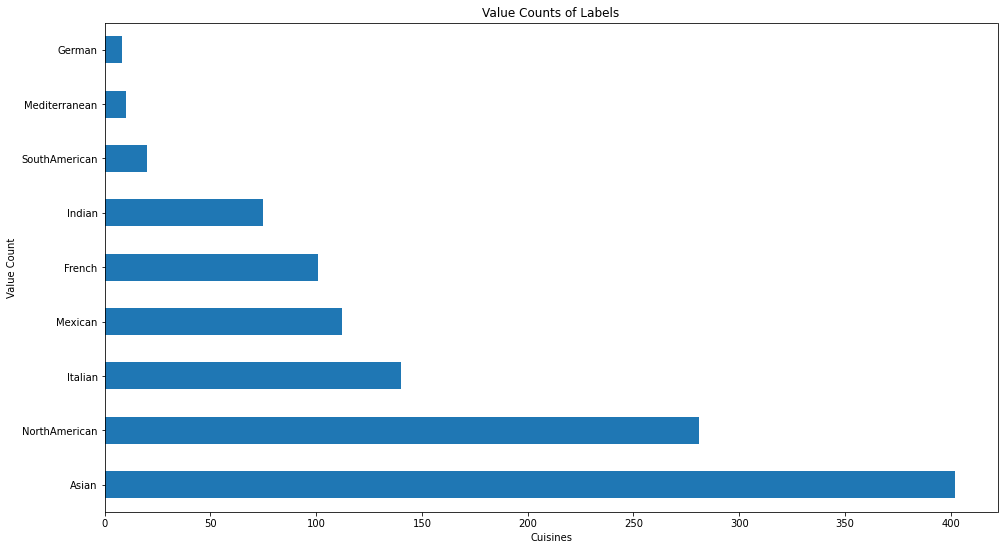

In [22]:
import matplotlib.pyplot as plt

plt.figure(num = 9, figsize=(16,9))

processed_df.Cuisine.value_counts().plot(kind = 'barh')

plt.title("Value Counts of Labels")
plt.xlabel("Cuisines")
plt.ylabel("Value Count")

plt.show()


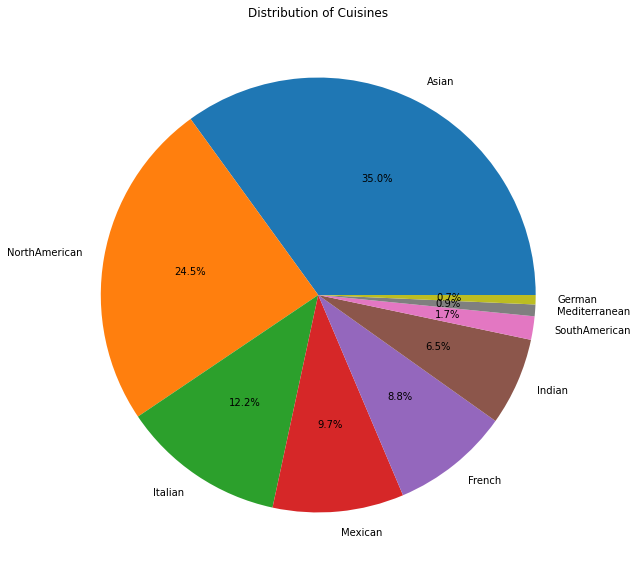

In [44]:
plt.figure(num = 1, figsize=(10,10))
#processed_df.Cuisine.value_counts().plot(kind = 'pie')
ax = plt.gca()
fig = plt.gcf()
fig.set_facecolor('xkcd:white')

plt.pie(processed_df.Cuisine.value_counts(), labels = processed_df.Cuisine.value_counts().index,autopct='%1.1f%%')
plt.title("Distribution of Cuisines")

plt.show()


In [45]:
processed_df.head()

,Cuisine,Ingredients,Steps,URL,Both
0,NorthAmerican,cans whole peeled tomatoes preferably importe...,Adjust oven rack to lower position and preheat...,https://www.seriouseats.com/the-best-slow-cook...,Adjust oven rack to lower position and preheat...
1,Asian,Two -inch pieces fresh ginger one piece peel...,In a medium mixing bowl stir together grated ...,https://www.seriouseats.com/pork-ginger-buta-s...,In a medium mixing bowl stir together grated ...
2,Asian,pound finely minced Napa cabbage tablespoon k...,For the Dumplings: Combine cabbage and 2 teasp...,https://www.seriouseats.com/the-best-japanese-...,For the Dumplings: Combine cabbage and 2 teasp...
3,Italian,to ounces fresh sea urchin ; see note / cup ...,Set aside 4 tongues of sea urchin to use as ga...,https://www.seriouseats.com/sea-urchin-uni-pas...,Set aside 4 tongues of sea urchin to use as ga...
4,Asian,large eggs ½ teaspoon lime juice or plain vin...,Combine eggs lime juice or vinegar fish sauc...,https://www.seriouseats.com/thai-style-omelet-...,Combine eggs lime juice or vinegar fish sauc...


# Text Processing and Feature Extraction

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

processed_df['Both'] = processed_df['Steps'] + processed_df['Ingredients']

sentences = processed_df['Both'].to_list()


vectorizer = CountVectorizer(min_df=0, stop_words='english')

vectorizer.fit(sentences)


CountVectorizer(min_df=0, stop_words='english')

In [24]:
word_to_index = vectorizer.vocabulary_

index_to_word = {v: k for k,v in vectorizer.vocabulary_.items()}

x = vectorizer.transform(sentences).toarray()


uniqueLabels = sorted(list(processed_df.Cuisine.unique()))
label_to_int = {l:i for i, l in enumerate(uniqueLabels)}
int_to_label = {i:l for i, l in enumerate(uniqueLabels)}

def getLabelFromInt(number, key):
    return key[number]
def getIntFromLabel(label, key):
    return key[label]

fullY = processed_df.Cuisine

y = np.array([getIntFromLabel(y, label_to_int) for y in fullY])


# Splitting data into Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state = 74)

y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)


# Building Models

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier()
params = {
    'criterion': ['gini','entropy'],
    'splitter' : ['best','random']
}

dtclf = RandomizedSearchCV(estimator, params, n_iter = 100, cv = 10)

dtclf.fit(x_train,y_train)

print(dtclf.best_params_)

accuracy_score(dtclf.predict(x_test), y_test)

C:\Users\jd74h\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\jd74h\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


{'splitter': 'best', 'criterion': 'entropy'}


0.5782608695652174

In [27]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
params = {
    'n_neighbors' : [i for i in range(5,100,5)],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knnModel = RandomizedSearchCV(estimator, params, n_iter = 100, cv = 10)

knnModel.fit(x_train,y_train)

accuracy_score(knnModel.predict(x_test), y_test)

C:\Users\jd74h\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 76 is smaller than n_iter=100. Running 76 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\jd74h\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


0.6173913043478261

In [47]:
knnModel.best_params_

{'n_neighbors': 5, 'algorithm': 'auto'}

In [28]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()
params = {
    'n_estimators' : [i for i in range(100,1000,250)],
    'criterion' : ['gini','entropy']
}

rfclf = RandomizedSearchCV(estimator, params, n_iter = 100, cv=10)

rfclf.fit(x_train,y_train)

accuracy_score(rfclf.predict(x_test),y_test)

C:\Users\jd74h\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\jd74h\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


0.7521739130434782

In [48]:
rfclf.best_params_

{'n_estimators': 850, 'criterion': 'gini'}

In [29]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

nbclf.fit(x_train,y_train)

accuracy_score(nbclf.predict(x_test),y_test)

0.6521739130434783

In [49]:
import keras
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

x_train_nn = np.expand_dims(x_train,1)
x_test_nn = np.expand_dims(x_test,1)

keras_callbacks = [
    EarlyStopping(patience=10,min_delta=.000001),
    ModelCheckpoint('modelCheckpoint.h5', save_best_only=True)
]

model = keras.Sequential()
model.add(LSTM(120, input_shape = x_train_nn.shape[1:], return_sequences=True))
model.add(Dropout(.25))
model.add(LSTM(120))
#model.add(Dropout(.1))
#model.add(Dense(100))
model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

train_history = model.fit(x_train_nn,y_train_nn, epochs = 100,callbacks = keras_callbacks, validation_split = .2)

model.evaluate(x_test_nn, y_test_nn)

Epoch 1/100
23/23 [==============================] - 4s 47ms/step - loss: 1.8372 - accuracy: 0.4190 - val_loss: 1.5219 - val_accuracy: 0.5761
Epoch 2/100
23/23 [==============================] - 0s 17ms/step - loss: 1.1453 - accuracy: 0.6136 - val_loss: 1.0597 - val_accuracy: 0.6630
Epoch 3/100
23/23 [==============================] - 0s 17ms/step - loss: 0.6178 - accuracy: 0.8503 - val_loss: 0.8491 - val_accuracy: 0.7446
Epoch 4/100
23/23 [==============================] - 0s 16ms/step - loss: 0.2843 - accuracy: 0.9497 - val_loss: 0.7939 - val_accuracy: 0.7609
Epoch 5/100
23/23 [==============================] - 0s 15ms/step - loss: 0.1337 - accuracy: 0.9714 - val_loss: 0.9538 - val_accuracy: 0.7446
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0714 - accuracy: 0.9891 - val_loss: 0.8946 - val_accuracy: 0.7663
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.9986 - val_loss: 0.9421 - val_accuracy: 0.7609
Epoch 

[0.8759010434150696, 0.8086956739425659]

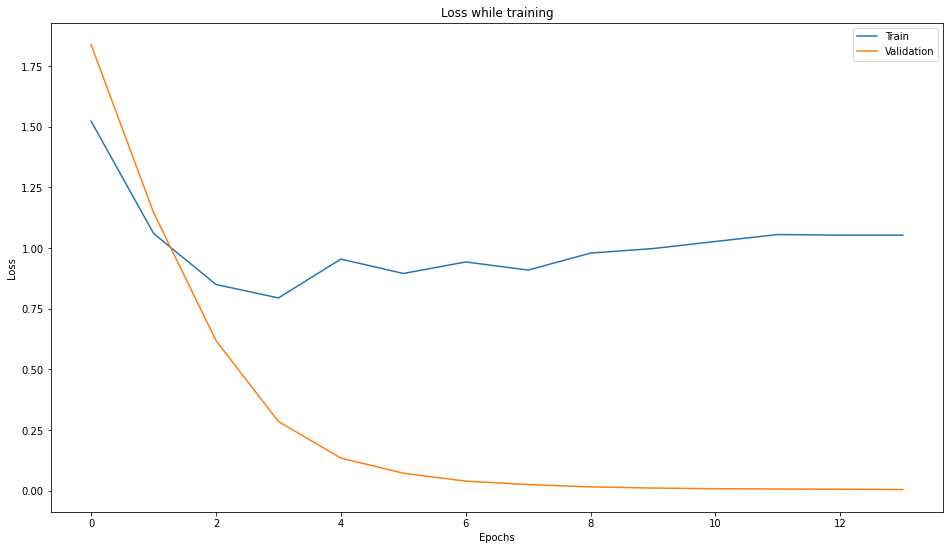

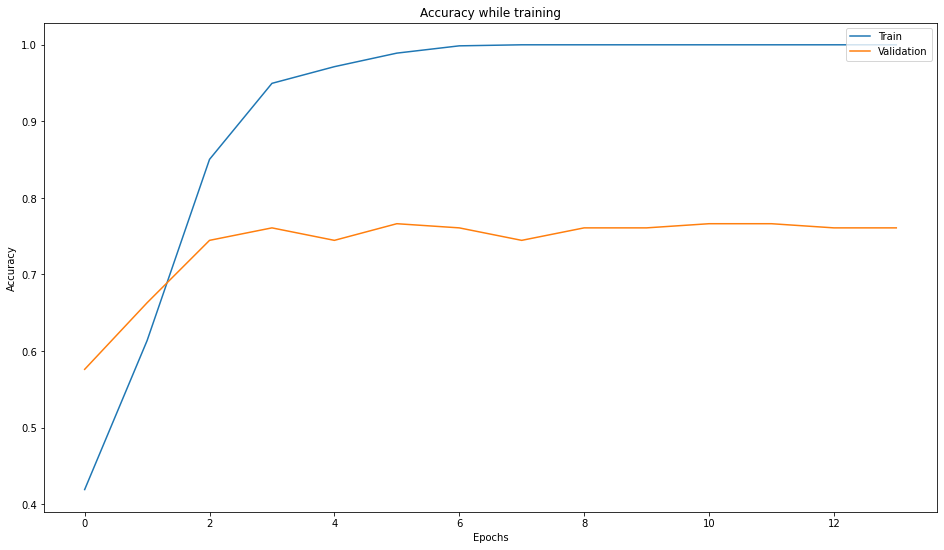

In [61]:
plt.figure(num=10, figsize = (16,9))
plt.plot(train_history.history['val_loss'])
plt.plot(train_history.history['loss'])
plt.title("Loss while training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Validation'], loc = 'upper right')
plt.show()

plt.figure(num=11, figsize=(16,9))
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title("Accuracy while training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Validation'], loc = 'upper right')
plt.show()